# Titanic Dataset

# Data cleaning

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = datasets.fetch_openml(name='Titanic', version=1, as_frame=True)
titanic = data.frame
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic.drop(columns=["ticket", "cabin", "boat", "body", "home.dest"], inplace=True, axis=1)

In [4]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,7.2250,C
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,7.8750,S


In [5]:
print(titanic.dtypes)

pclass         int64
survived    category
name          object
sex         category
age          float64
sibsp          int64
parch          int64
fare         float64
embarked    category
dtype: object


In [6]:
titanic.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [7]:
titanic["fare"].fillna(titanic["fare"].mean(), inplace=True)

In [8]:
titanic["embarked"].fillna('S', inplace=True)

In [9]:
titanic.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [10]:
print(titanic["parch"].value_counts())
print("--------------------------")
print(titanic["sibsp"].value_counts())
print("--------------------------")
print(titanic["sex"].value_counts())
print("--------------------------")
print(titanic["pclass"].value_counts())

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64
--------------------------
sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64
--------------------------
sex
male      843
female    466
Name: count, dtype: int64
--------------------------
pclass
3    709
1    323
2    277
Name: count, dtype: int64


### Some Feature enginnering

I will extract title from name column

In [11]:
def get_title(name):
    ans = name.split(", ")[1].split(".")[0]
    return ans
titanic["title"] = titanic["name"].apply(get_title)

In [12]:
titanic["title"].value_counts()

title
Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Lady              1
Capt              1
Mme               1
Sir               1
Jonkheer          1
Dona              1
Don               1
the Countess      1
Name: count, dtype: int64

In [13]:
rare_val = titanic["title"].value_counts().index[4:]
titanic["title"] = titanic["title"].replace(rare_val, "rare")

In [14]:
titanic["title"].value_counts()

title
Mr        757
Miss      260
Mrs       197
Master     61
rare       34
Name: count, dtype: int64

I will combine sibsp and parch column into one. This column will be total family size of a person.

No. of siblings and spouse + No. of children and parents = Family size

In [15]:
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

In [16]:
titanic["family_size"].value_counts()

family_size
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

In [17]:
def family_size(members):
    if members == 1:
        return "Alone"
    elif members > 1 and members < 5:
        return "Small"
    else:
        return "Large"
    
titanic["family_size"] = titanic["family_size"].apply(family_size)

In [18]:
titanic["family_size"].value_counts()

family_size
Alone    790
Small    437
Large     82
Name: count, dtype: int64

In [19]:
titanic.drop(["name", "sibsp", "parch"], axis=1, inplace=True)

In [20]:
titanic["age"] = titanic['age']=titanic.groupby(['sex','pclass'])['age'].transform(lambda x: x.fillna(x.median()))
titanic["survived"] = titanic["survived"].astype("int64")

In [21]:
titanic.sample(5)

,pclass,survived,sex,age,fare,embarked,title,family_size
78,1,1,female,64.0,83.1583,C,Mrs,Small
271,1,1,male,24.0,82.2667,S,Mr,Small
1043,3,1,female,22.0,15.5000,Q,Miss,Small
1241,3,0,male,25.0,6.4375,C,Mr,Small
323,2,0,male,30.0,24.0000,C,Mr,Small


## Exploratory Data Analysis

In [22]:
df = titanic.copy()
df["survived"] = df["survived"].astype('int64')


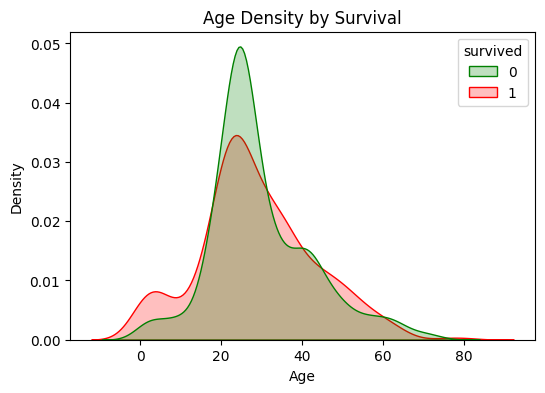

In [23]:
"""
plt.figure(figsize=(6,4))
bins = np.arange(0, df['age'].max() + 5, 5)
plt.hist(df[df['survived'] == 0]['age'].dropna(), bins=bins, alpha=0.6, color='green', label='Not Survived')
plt.hist(df[df['survived'] == 1]['age'].dropna(), bins=bins, alpha=0.6, color='red', label='Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()
"""

plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='age', hue='survived', common_norm=False, fill=True, palette={0: 'green', 1: 'red'})
plt.title('Age Density by Survival')
plt.xlabel('Age')
plt.show()

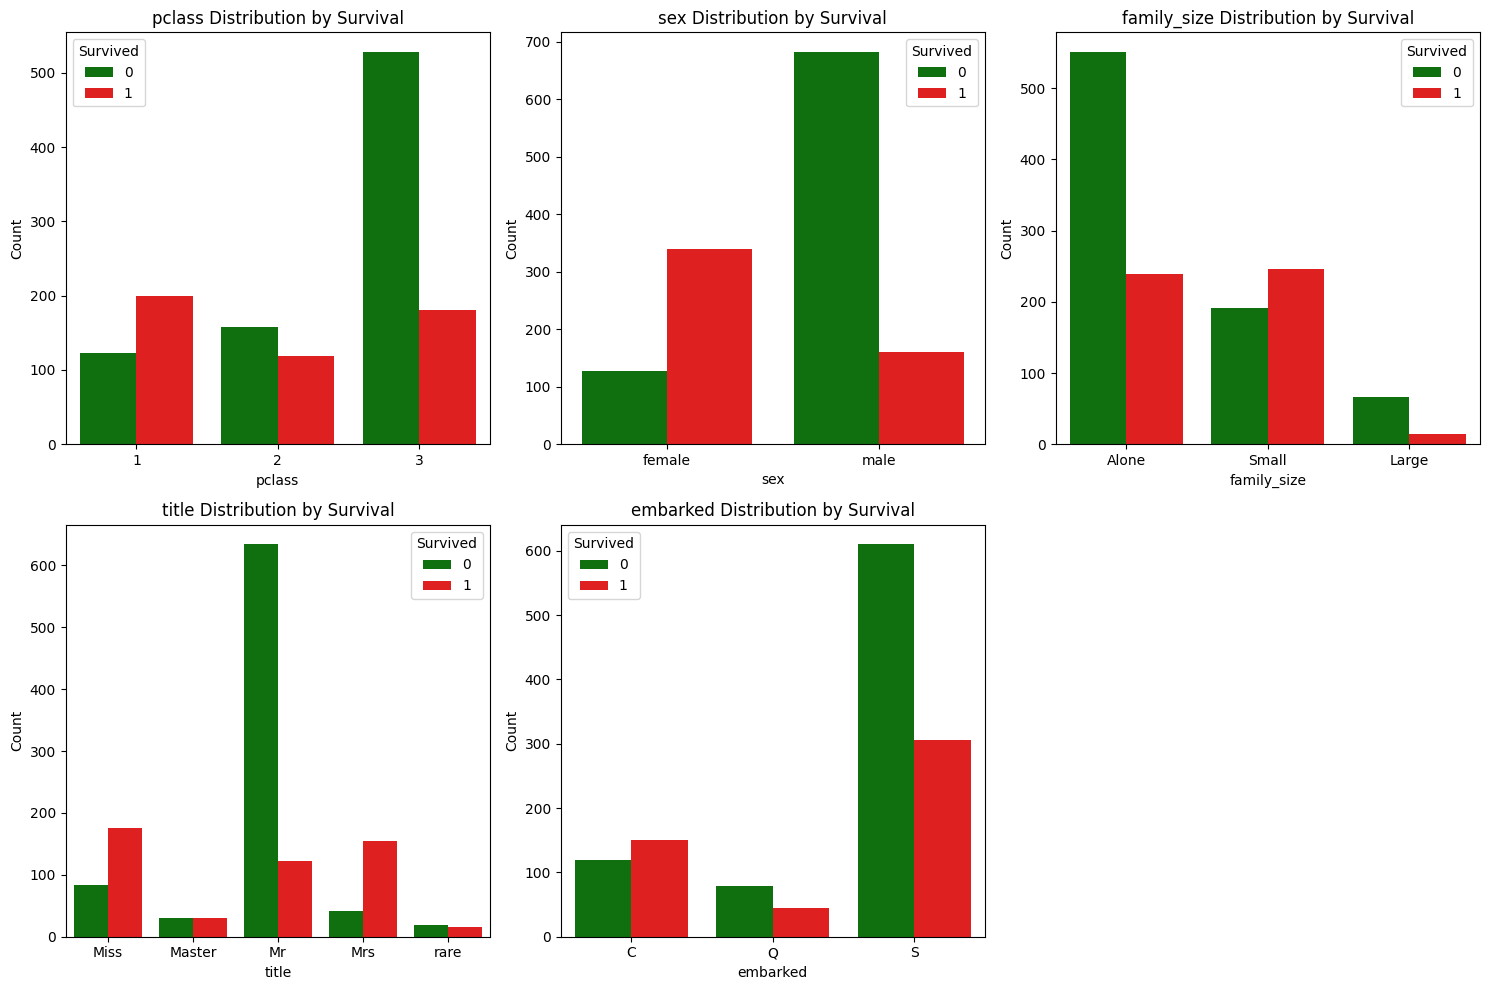

In [24]:
cols = ["pclass", "sex", "family_size", "title", "embarked"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, c in enumerate(cols):
    ax = axes[i]
    sns.countplot(data=df, x=c, hue='survived', palette={0: 'green', 1: 'red'}, ax=ax)
    ax.set_title(f"{c} Distribution by Survival")
    ax.set_xlabel(c)
    ax.set_ylabel('Count')
    ax.legend(title='Survived')

axes[len(cols)].axis('off')
plt.tight_layout()
plt.show()

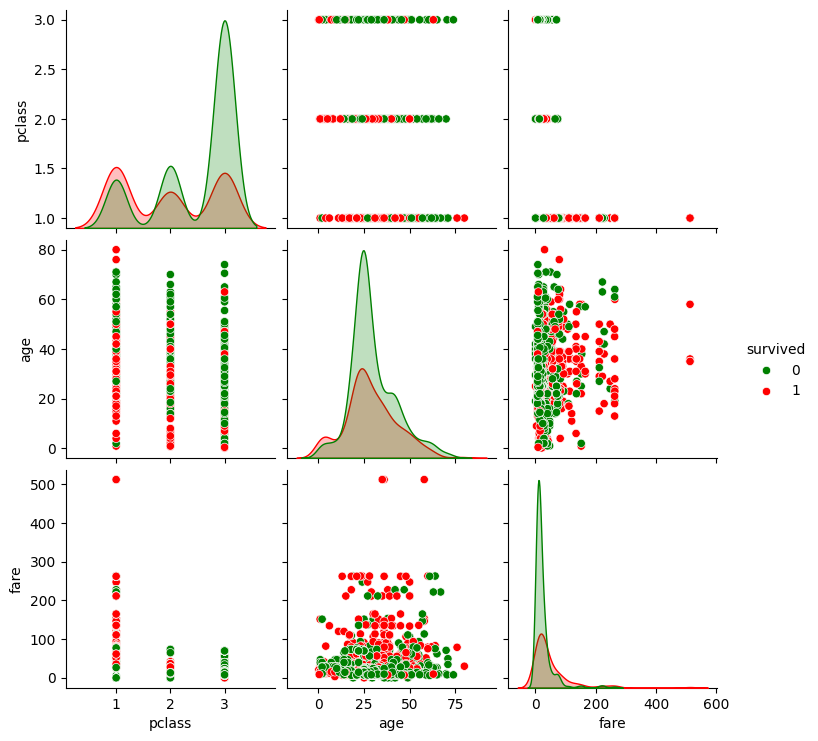

In [25]:
sns.pairplot(df, hue="survived", palette={0: "green", 1: "red"})

## Feature Enginnering

In [26]:
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [27]:
X = titanic.drop("survived", axis=1)
Y = titanic['survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
X_train

,pclass,sex,age,fare,embarked,title,family_size
772,3,male,17.0,7.8958,S,Mr,Alone
543,2,male,36.0,10.5000,S,Mr,Alone
289,1,female,18.0,79.6500,S,Miss,Small
10,1,male,47.0,227.5250,C,rare,Small
147,1,male,42.0,42.4000,S,Mr,Alone
...,...,...,...,...,...,...,...
1095,3,female,22.0,7.6292,Q,Miss,Alone
1130,3,female,18.0,7.7750,S,Miss,Alone
1294,3,male,28.5,16.1000,S,Mr,Alone
860,3,female,26.0,7.9250,S,Miss,Alone


In [28]:
num_cat_col = ColumnTransformer([
    ("scale", MinMaxScaler(), [2, 3]),
    ("ordinal", OrdinalEncoder(), [0]),
    ("ohe", OneHotEncoder(drop="first"), [1, 4, 5, 6])
], remainder="passthrough")

In [29]:
bins = ColumnTransformer([
    ("kbd", KBinsDiscretizer(n_bins=15, encode="ordinal", strategy="quantile"), [2, 3])
], remainder="passthrough")

In [30]:
preprocessor = Pipeline([
    ("num_cat_col", num_cat_col),
    ("bin", bins)
])

In [31]:
preprocessor.fit(X_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('num_cat_col', ...), ('bin', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('scale', ...), ('ordinal', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different 

In [32]:
def gen_pipeline(algo):
    return Pipeline([
        ("preprocessor", preprocessor),
        ("model", algo)
    ])

## Model Training

### will train the data on these model:

1. RandomForestClassifier
2. AdaBoosClassifier
3. GredientBoostClassifier
4. LogisticRegressionClassifier
5. Stocastic GredientDesent classifier
6. SVM Classifier
7. Percepron Classifier
8. kNearest Neighbour classifier
9. Gaussian Naieve bayes
10. Discision tree classifier


In [33]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [34]:
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42, n_estimators=1500, n_jobs=-1),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegressionClassigier": LogisticRegressionCV(),
    "SGDClassifier": SGDClassifier(loss="log_loss", random_state=42),
    "SVM": LinearSVC(),
    "Perceptron": Perceptron(penalty="l2"),
    "KnearestNeighbour": KNeighborsClassifier(),
    "GaussianNaiveBayes": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBClassifier":XGBClassifier()
}

In [35]:
pipelines = {}
scores = {}

for name, model in models.items():
    pipeline = gen_pipeline(model)
    score = cross_val_score(pipeline, X_train, Y_train, cv=5)
    pipelines[name] = pipeline
    scores[name] = score.mean()

In [36]:
df_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['cv_score'])
df_scores = df_scores.sort_values('cv_score', ascending=False)
df_scores

,cv_score
LogisticRegressionClassigier,0.819449
SVM,0.816573
AdaBoostClassifier,0.815639
GradientBoostingClassifier,0.804220
SGDClassifier,0.797457
XGBClassifier,0.795603
RandomForestClassifier,0.791775
KnearestNeighbour,0.785122
GaussianNaiveBayes,0.785085
Perceptron,0.779321


<Figure size 1000x600 with 0 Axes>

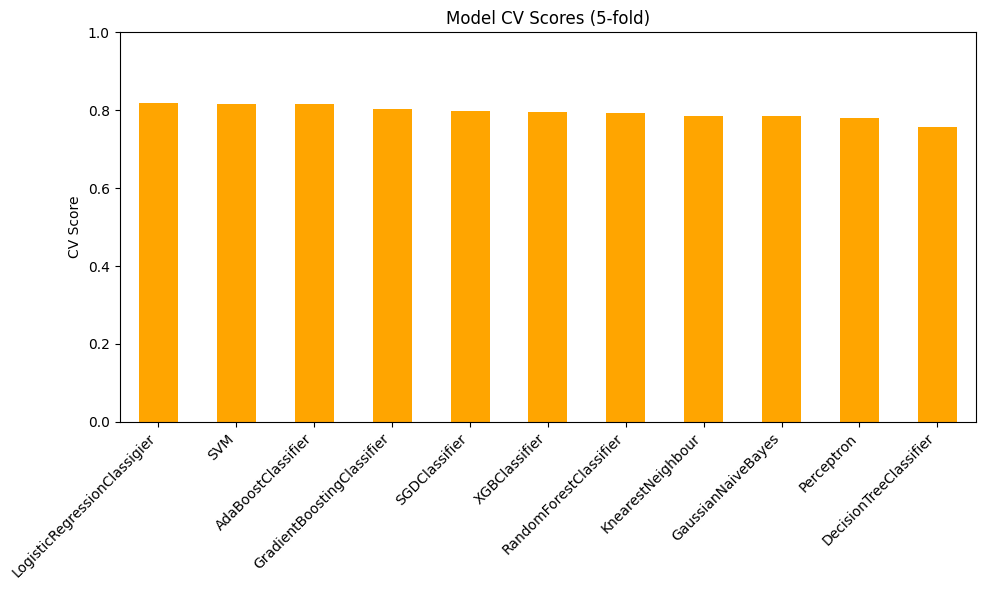

In [62]:
plt.figure(figsize=(10,6))
df_scores.plot(kind='bar', legend=False, color='orange', figsize=(10,6))
plt.ylabel('CV Score')
plt.title('Model CV Scores (5-fold)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
rfc_param = {
    "model__n_estimators": [500, 1000, 1500, 2000],
    "model__max_depth": [7, 14],
    "model__min_samples_split": [6, 12],
    "model__min_samples_leaf": [6, 12]
}
rfc_model = pipelines["RandomForestClassifier"]
grid_rfc = GridSearchCV(rfc_model, rfc_param, cv=3, scoring="f1_macro", n_jobs=-1)
grid_rfc.fit(X_train, Y_train)
print(grid_rfc.best_params_)
best_rfc = grid_rfc.best_estimator_

{'model__max_depth': 7, 'model__min_samples_leaf': 6, 'model__min_samples_split': 6, 'model__n_estimators': 2000}


In [47]:
log_param = {
    "model__Cs": [0.01, 0.1, 1, 10],
    "model__penalty": ['l2', 'elasticnet'],
    "model__solver": ['liblinear', 'lbfgs'],
    "model__max_iter": [100, 300, 500]
}

log_model = pipelines["LogisticRegressionClassigier"]
grid_log = GridSearchCV(log_model, log_param, cv=3, scoring="accuracy", n_jobs=-1)
grid_log.fit(X_train, Y_train)
best_log = grid_log.best_estimator_
print(grid_log.best_params_)

{'model__Cs': 10, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [40]:
ada_params = {
    "model__n_estimators": [50, 100, 150],
}
ada_model = pipelines["AdaBoostClassifier"]
grid_ada = GridSearchCV(ada_model, ada_params, cv=3, scoring="f1_macro")
grid_ada.fit(X_train, Y_train)
best_ada = grid_log.best_estimator_
print(grid_ada.best_params_)

{'model__n_estimators': 50}


In [50]:
tuned_model = {
    "LogisticRegresstion (Tuned)": best_log,
    "RandomForestClassifier (Tuned)": best_rfc,
    "AdaBoostClassifier (Tuned)": best_ada
}

tuned_score = {}

for name, model in tuned_model.items():
    y_predict = model.predict(X_test)

    tuned_score[name] = {
        "accuracy": accuracy_score(Y_test, y_predict),
        "f1_macro": f1_score(Y_test, y_predict, average='macro'),
        "confusion_matrix": confusion_matrix(Y_test, y_predict)
    }
    

In [51]:
pd.DataFrame(tuned_score).T

,accuracy,f1_macro,confusion_matrix
LogisticRegresstion (Tuned),0.790076,0.784265,"[[125, 19], [36, 82]]"
RandomForestClassifier (Tuned),0.790076,0.783695,"[[126, 18], [37, 81]]"
AdaBoostClassifier (Tuned),0.790076,0.784265,"[[125, 19], [36, 82]]"


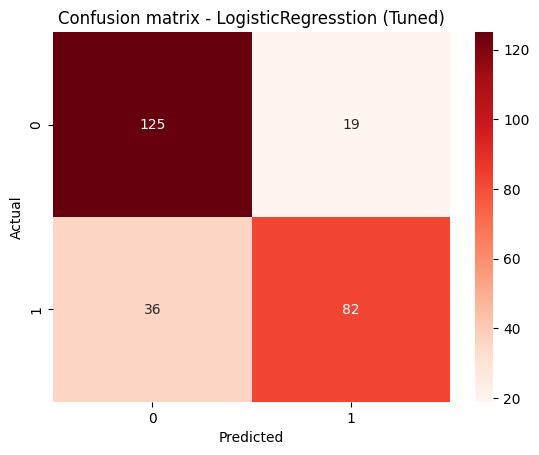

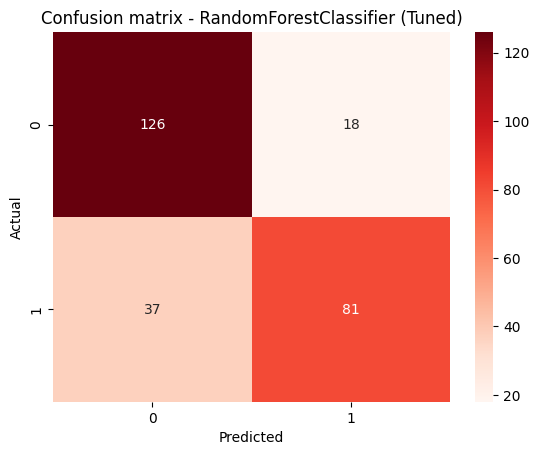

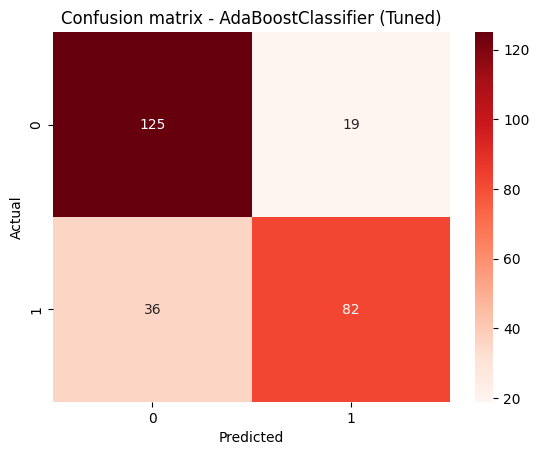

In [60]:
for name, scores in tuned_score.items():
    plt.Figure(figsize=(4, 5))
    sns.heatmap(scores["confusion_matrix"], fmt='d', cmap='Reds', annot=True)
    plt.title(f'Confusion matrix - {name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()